# <center> <b><span style="color:blue">Mchine Learning Strategy For Detecting Cyber attacks on Industrial Control Systems  (ICS)     </b> </span></center>

## <b> <span><center>Tamir Suliman</b> </span></center>

## Import Libraries

In [21]:
import os
import pandas as pd
import numpy as np
from pathlib import Path  
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestClassifier 
from statsmodels.tsa.vector_ar.var_model import VAR

## Import Data from CSV File

In [3]:
PATH = 'https://raw.githubusercontent.com/icsdataset/hai/master/hai-21.03/test2.csv.gz'
hai_data_orig = pd.read_csv(PATH, compression='gzip')

predictors = hai_data_orig[['time','P1_B2004','P1_B2016','P1_B3004','P1_B3005','P1_B4002',
                         'P1_FCV01D','P1_FCV03D','P1_FT03','P1_LCV01D','P1_LIT01',
                         'P1_PCV01D','P1_PIT01','P2_ASD','P2_CO_rpm','P2_RTR','P2_SIT01',
                         'P2_VTR01','P2_VTR02','P3_LCP01D','P4_HT_PS','P4_ST_PS','attack']]

filepath = Path('dataset/hai_data1.csv')
predictors.to_csv(filepath, index=False)
hai_data = pd.read_csv(filepath,header=0,parse_dates=['time'], index_col='time') 
hai_data_r = pd.read_csv(filepath, parse_dates=['time'])

In [4]:
hai_data.head()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_FCV01D,P1_FCV03D,P1_FT03,P1_LCV01D,P1_LIT01,...,P2_ASD,P2_CO_rpm,P2_RTR,P2_SIT01,P2_VTR01,P2_VTR02,P3_LCP01D,P4_HT_PS,P4_ST_PS,attack
time,,,,,,,,,,,,,,,,,,,,,
2020-07-09 15:00:00,0.09874,1.25036,382.21698,1118.61084,32.0,92.69160,69.76647,315.48346,13.97231,384.30737,...,0,54065.0,2880,774.0,10,10,136,0,0,0
2020-07-09 15:00:01,0.09874,1.24944,382.21698,1118.61084,32.0,92.64934,69.74272,315.10199,13.93358,384.30737,...,0,54073.0,2880,773.0,10,10,136,0,0,0
2020-07-09 15:00:02,0.09874,1.24746,382.21698,1118.61084,32.0,92.91075,69.77000,316.05570,13.95248,384.20517,...,0,54073.0,2880,773.0,10,10,136,0,0,0
2020-07-09 15:00:03,0.09874,1.24624,382.21698,1118.61084,32.0,92.92407,69.70607,315.10199,13.89971,384.25626,...,0,54086.0,2880,777.0,10,10,136,0,0,0
2020-07-09 15:00:04,0.09874,1.24364,382.21698,1118.61084,32.0,93.05405,69.76971,315.48346,13.94603,384.20517,...,0,54086.0,2880,778.0,10,10,136,0,0,0


In [19]:
type(hai_data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [23]:
x = hai_data.values
clf = IsolationForest(contamination=0.1)
clf.fit_predict(x)

array([-1, -1, -1, ...,  1,  1,  1])

In [26]:
clf.decision_function(x)

array([-0.0163664 , -0.01058243, -0.00845421, ...,  0.07515441,
        0.07847215,  0.06897121])

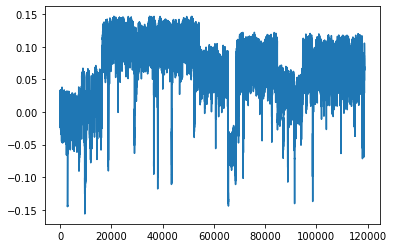

In [27]:
dec_fun = clf.decision_function(x)
plt.plot(dec_fun)

In [28]:
hai_data['health'] = dec_fun
hai_data.head()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_FCV01D,P1_FCV03D,P1_FT03,P1_LCV01D,P1_LIT01,...,P2_CO_rpm,P2_RTR,P2_SIT01,P2_VTR01,P2_VTR02,P3_LCP01D,P4_HT_PS,P4_ST_PS,attack,health
time,,,,,,,,,,,,,,,,,,,,,
2020-07-09 15:00:00,0.09874,1.25036,382.21698,1118.61084,32.0,92.69160,69.76647,315.48346,13.97231,384.30737,...,54065.0,2880,774.0,10,10,136,0,0,0,-0.016366
2020-07-09 15:00:01,0.09874,1.24944,382.21698,1118.61084,32.0,92.64934,69.74272,315.10199,13.93358,384.30737,...,54073.0,2880,773.0,10,10,136,0,0,0,-0.010582
2020-07-09 15:00:02,0.09874,1.24746,382.21698,1118.61084,32.0,92.91075,69.77000,316.05570,13.95248,384.20517,...,54073.0,2880,773.0,10,10,136,0,0,0,-0.008454
2020-07-09 15:00:03,0.09874,1.24624,382.21698,1118.61084,32.0,92.92407,69.70607,315.10199,13.89971,384.25626,...,54086.0,2880,777.0,10,10,136,0,0,0,0.003507
2020-07-09 15:00:04,0.09874,1.24364,382.21698,1118.61084,32.0,93.05405,69.76971,315.48346,13.94603,384.20517,...,54086.0,2880,778.0,10,10,136,0,0,0,0.004625


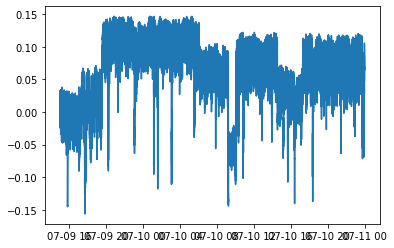

In [29]:
plt.plot(hai_data['health'])

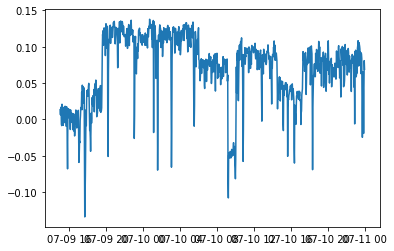

In [33]:
plt.plot(hai_data['health'].resample('5T').mean())

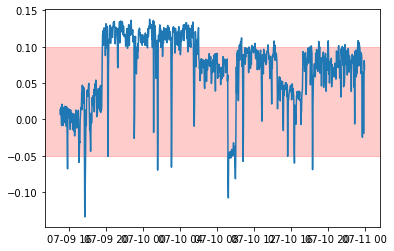

In [39]:
plt.plot(hai_data['health'].resample('5T').mean())
plt.axhspan(-0.05,0.1 , alpha=.2 , color='red')